In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular

Carichiamo i dati 

In [3]:
data = load_breast_cancer()
X, y = data['data'], data['target']

print(X)
print(y)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Print per vedere se maligno o benigno

In [4]:

print(data['target_names'])

['malignant' 'benign']


Usiamo un tree classifier come primo approccio ma cosi non avremmo bisogno di lime in realta

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
print(tree_clf.score(X_test, y_test))

0.9122807017543859


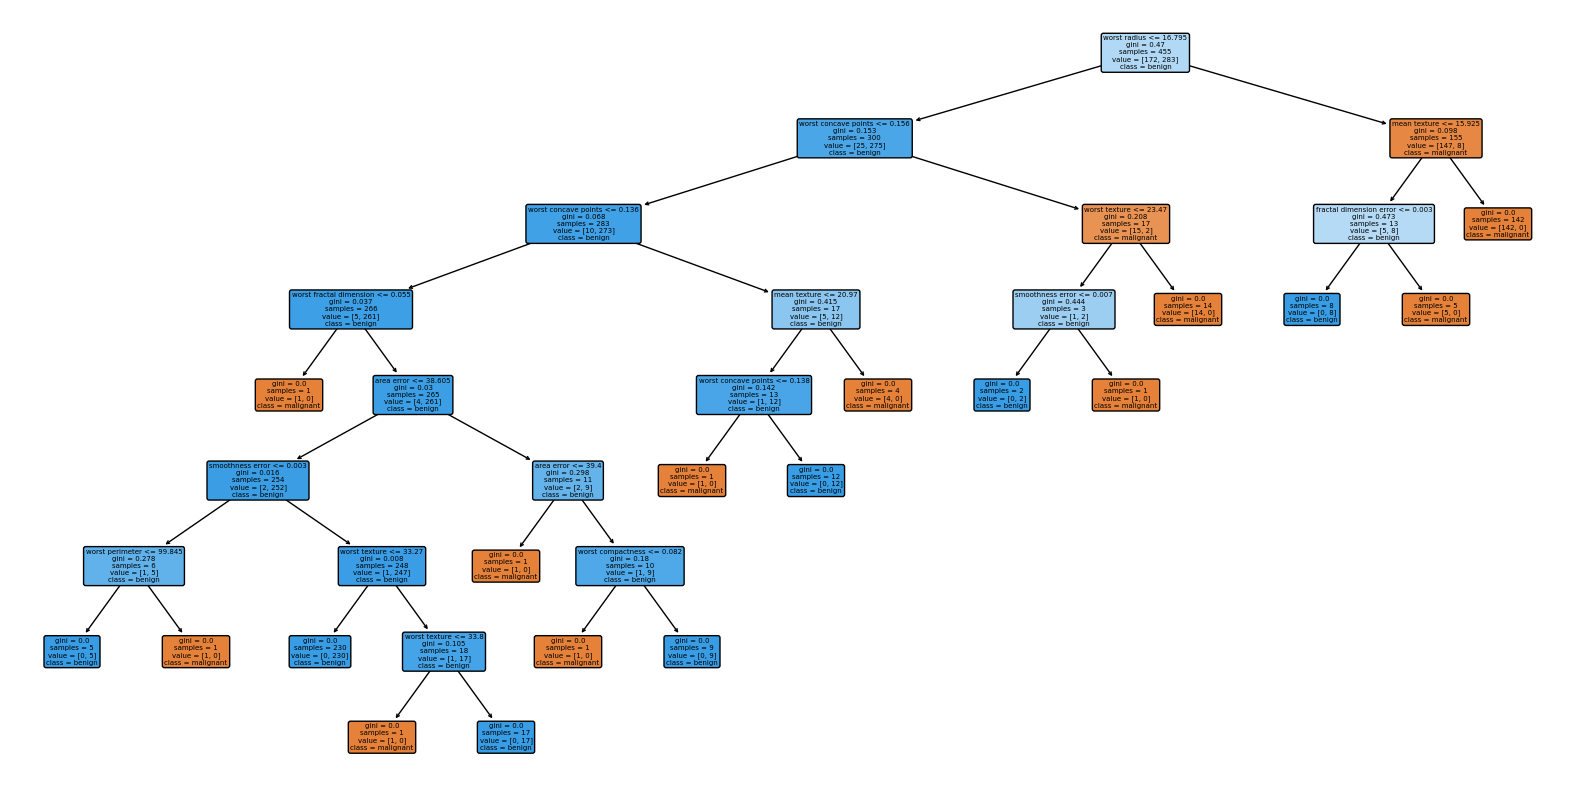

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=data['feature_names'], class_names=data['target_names'],rounded=True)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
print('accuracy forest classifier:', forest_clf.score(X_test, y_test))

accuracy forest classifier: 0.9824561403508771


Qua vediamo l'importanza che viene data alle varie feature ma non sappiamo perchè

In [8]:
print(dict(zip(data['feature_names'], forest_clf.feature_importances_)))

{'mean radius': 0.04242595104347156, 'mean texture': 0.014934640835311394, 'mean perimeter': 0.025498298568360507, 'mean area': 0.04916298983514672, 'mean smoothness': 0.005935061072172933, 'mean compactness': 0.012998449041570565, 'mean concavity': 0.06959030118222777, 'mean concave points': 0.13210223480096278, 'mean symmetry': 0.004355276022693637, 'mean fractal dimension': 0.004814283504200793, 'radius error': 0.013691493879453122, 'texture error': 0.004429428424406909, 'perimeter error': 0.01147287195380283, 'area error': 0.027914551161253034, 'smoothness error': 0.004742728795823899, 'compactness error': 0.005760704853463572, 'concavity error': 0.009628770066995626, 'concave points error': 0.008919228164132327, 'symmetry error': 0.0037710343563878263, 'fractal dimension error': 0.006645412878314505, 'worst radius': 0.10475763410947436, 'worst texture': 0.019055462353966848, 'worst perimeter': 0.09676514073171606, 'worst area': 0.11116602484472923, 'worst smoothness': 0.0136778391

Ora usiamo lime per spiegare queste scelte che vengono fatte

Correct:  Benign
Classification:  [1]
{'mean radius': 11.43, 'mean texture': 15.39, 'mean perimeter': 73.06, 'mean area': 399.8, 'mean smoothness': 0.09639, 'mean compactness': 0.06889, 'mean concavity': 0.03503, 'mean concave points': 0.02875, 'mean symmetry': 0.1734, 'mean fractal dimension': 0.05865, 'radius error': 0.1759, 'texture error': 0.9938, 'perimeter error': 1.143, 'area error': 12.67, 'smoothness error': 0.005133, 'compactness error': 0.01521, 'concavity error': 0.01434, 'concave points error': 0.008602, 'symmetry error': 0.01501, 'fractal dimension error': 0.001588, 'worst radius': 12.32, 'worst texture': 22.02, 'worst perimeter': 79.93, 'worst area': 462.0, 'worst smoothness': 0.119, 'worst compactness': 0.1648, 'worst concavity': 0.1399, 'worst concave points': 0.08476, 'worst symmetry': 0.2676, 'worst fractal dimension': 0.06765}


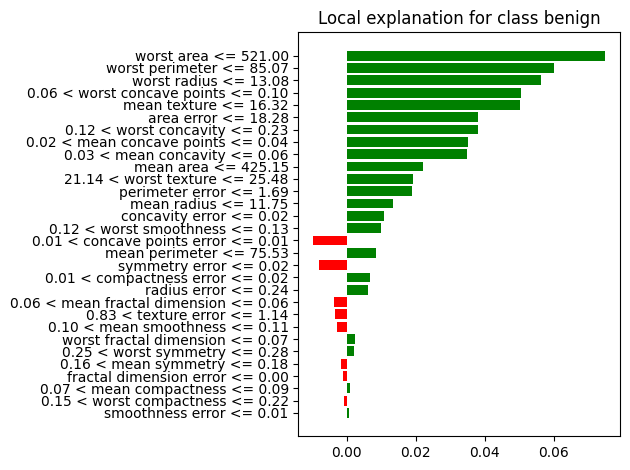

Correct:  Benign
Classification:  [1]
{'mean radius': 11.52, 'mean texture': 18.75, 'mean perimeter': 73.34, 'mean area': 409.0, 'mean smoothness': 0.09524, 'mean compactness': 0.05473, 'mean concavity': 0.03036, 'mean concave points': 0.02278, 'mean symmetry': 0.192, 'mean fractal dimension': 0.05907, 'radius error': 0.3249, 'texture error': 0.9591, 'perimeter error': 2.183, 'area error': 23.47, 'smoothness error': 0.008328, 'compactness error': 0.008722, 'concavity error': 0.01349, 'concave points error': 0.00867, 'symmetry error': 0.03218, 'fractal dimension error': 0.002386, 'worst radius': 12.84, 'worst texture': 22.47, 'worst perimeter': 81.81, 'worst area': 506.2, 'worst smoothness': 0.1249, 'worst compactness': 0.0872, 'worst concavity': 0.09076, 'worst concave points': 0.06316, 'worst symmetry': 0.3306, 'worst fractal dimension': 0.07036}


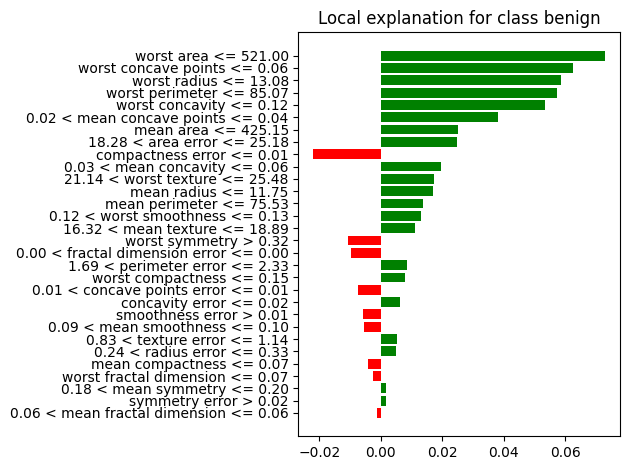

Correct:  Malignant
Classification:  [0]
{'mean radius': 12.68, 'mean texture': 23.84, 'mean perimeter': 82.69, 'mean area': 499.0, 'mean smoothness': 0.1122, 'mean compactness': 0.1262, 'mean concavity': 0.1128, 'mean concave points': 0.06873, 'mean symmetry': 0.1905, 'mean fractal dimension': 0.0659, 'radius error': 0.4255, 'texture error': 1.178, 'perimeter error': 2.927, 'area error': 36.46, 'smoothness error': 0.007781, 'compactness error': 0.02648, 'concavity error': 0.02973, 'concave points error': 0.0129, 'symmetry error': 0.01635, 'fractal dimension error': 0.003601, 'worst radius': 17.09, 'worst texture': 33.47, 'worst perimeter': 111.8, 'worst area': 888.3, 'worst smoothness': 0.1851, 'worst compactness': 0.4061, 'worst concavity': 0.4024, 'worst concave points': 0.1716, 'worst symmetry': 0.3383, 'worst fractal dimension': 0.1031}


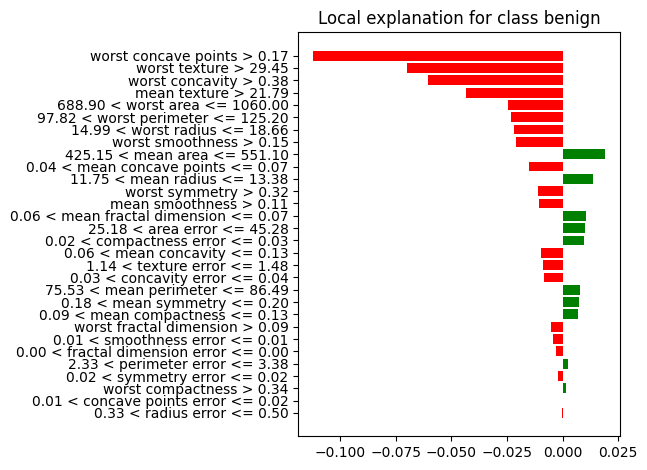

Correct:  Benign
Classification:  [1]
{'mean radius': 9.742, 'mean texture': 15.67, 'mean perimeter': 61.5, 'mean area': 289.9, 'mean smoothness': 0.09037, 'mean compactness': 0.04689, 'mean concavity': 0.01103, 'mean concave points': 0.01407, 'mean symmetry': 0.2081, 'mean fractal dimension': 0.06312, 'radius error': 0.2684, 'texture error': 1.409, 'perimeter error': 1.75, 'area error': 16.39, 'smoothness error': 0.0138, 'compactness error': 0.01067, 'concavity error': 0.008347, 'concave points error': 0.009472, 'symmetry error': 0.01798, 'fractal dimension error': 0.004261, 'worst radius': 10.75, 'worst texture': 20.88, 'worst perimeter': 68.09, 'worst area': 355.2, 'worst smoothness': 0.1467, 'worst compactness': 0.0937, 'worst concavity': 0.04043, 'worst concave points': 0.05159, 'worst symmetry': 0.2841, 'worst fractal dimension': 0.08175}


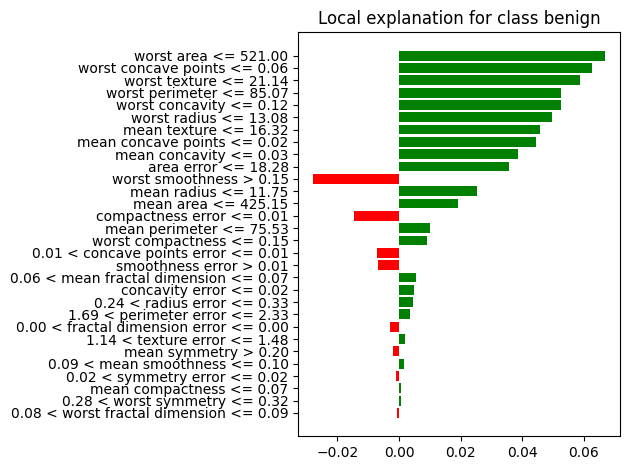

Correct:  Benign
Classification:  [1]
{'mean radius': 14.4, 'mean texture': 26.99, 'mean perimeter': 92.25, 'mean area': 646.1, 'mean smoothness': 0.06995, 'mean compactness': 0.05223, 'mean concavity': 0.03476, 'mean concave points': 0.01737, 'mean symmetry': 0.1707, 'mean fractal dimension': 0.05433, 'radius error': 0.2315, 'texture error': 0.9112, 'perimeter error': 1.727, 'area error': 20.52, 'smoothness error': 0.005356, 'compactness error': 0.01679, 'concavity error': 0.01971, 'concave points error': 0.00637, 'symmetry error': 0.01414, 'fractal dimension error': 0.001892, 'worst radius': 15.4, 'worst texture': 31.98, 'worst perimeter': 100.4, 'worst area': 734.6, 'worst smoothness': 0.1017, 'worst compactness': 0.146, 'worst concavity': 0.1472, 'worst concave points': 0.05563, 'worst symmetry': 0.2345, 'worst fractal dimension': 0.06464}


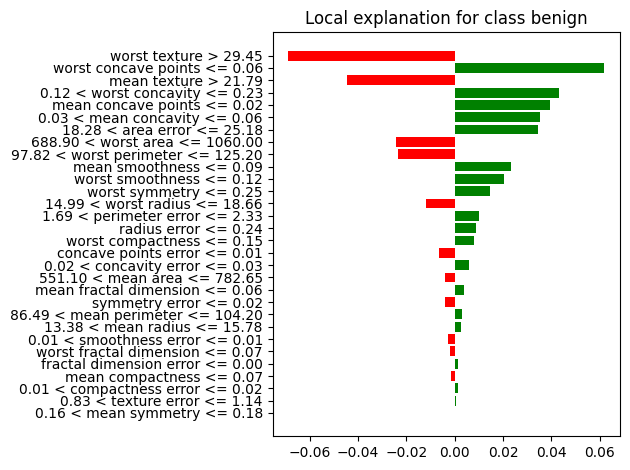

Correct:  Benign
Classification:  [1]
{'mean radius': 14.2, 'mean texture': 20.53, 'mean perimeter': 92.41, 'mean area': 618.4, 'mean smoothness': 0.08931, 'mean compactness': 0.1108, 'mean concavity': 0.05063, 'mean concave points': 0.03058, 'mean symmetry': 0.1506, 'mean fractal dimension': 0.06009, 'radius error': 0.3478, 'texture error': 1.018, 'perimeter error': 2.749, 'area error': 31.01, 'smoothness error': 0.004107, 'compactness error': 0.03288, 'concavity error': 0.02821, 'concave points error': 0.0135, 'symmetry error': 0.0161, 'fractal dimension error': 0.002744, 'worst radius': 16.45, 'worst texture': 27.26, 'worst perimeter': 112.1, 'worst area': 828.5, 'worst smoothness': 0.1153, 'worst compactness': 0.3429, 'worst concavity': 0.2512, 'worst concave points': 0.1339, 'worst symmetry': 0.2534, 'worst fractal dimension': 0.07858}


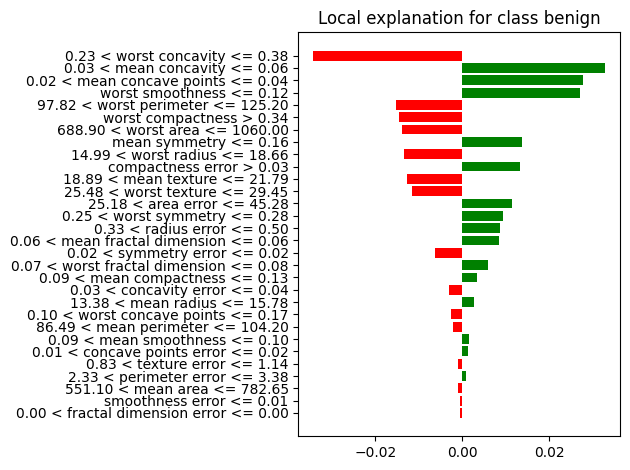

Correct:  Malignant
Classification:  [0]
{'mean radius': 15.34, 'mean texture': 14.26, 'mean perimeter': 102.5, 'mean area': 704.4, 'mean smoothness': 0.1073, 'mean compactness': 0.2135, 'mean concavity': 0.2077, 'mean concave points': 0.09756, 'mean symmetry': 0.2521, 'mean fractal dimension': 0.07032, 'radius error': 0.4388, 'texture error': 0.7096, 'perimeter error': 3.384, 'area error': 44.91, 'smoothness error': 0.006789, 'compactness error': 0.05328, 'concavity error': 0.06446, 'concave points error': 0.02252, 'symmetry error': 0.03672, 'fractal dimension error': 0.004394, 'worst radius': 18.07, 'worst texture': 19.08, 'worst perimeter': 125.1, 'worst area': 980.9, 'worst smoothness': 0.139, 'worst compactness': 0.5954, 'worst concavity': 0.6305, 'worst concave points': 0.2393, 'worst symmetry': 0.4667, 'worst fractal dimension': 0.09946}


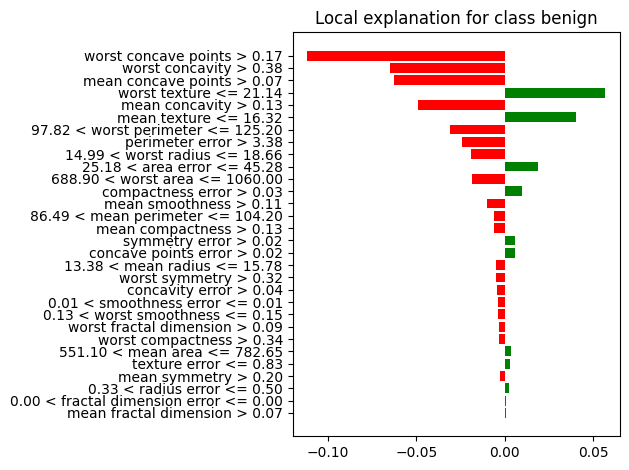

Correct:  Benign
Classification:  [1]
{'mean radius': 11.25, 'mean texture': 14.78, 'mean perimeter': 71.38, 'mean area': 390.0, 'mean smoothness': 0.08306, 'mean compactness': 0.04458, 'mean concavity': 0.0009737, 'mean concave points': 0.002941, 'mean symmetry': 0.1773, 'mean fractal dimension': 0.06081, 'radius error': 0.2144, 'texture error': 0.9961, 'perimeter error': 1.529, 'area error': 15.07, 'smoothness error': 0.005617, 'compactness error': 0.007124, 'concavity error': 0.0009737, 'concave points error': 0.002941, 'symmetry error': 0.017, 'fractal dimension error': 0.00203, 'worst radius': 12.76, 'worst texture': 22.06, 'worst perimeter': 82.08, 'worst area': 492.7, 'worst smoothness': 0.1166, 'worst compactness': 0.09794, 'worst concavity': 0.005518, 'worst concave points': 0.01667, 'worst symmetry': 0.2815, 'worst fractal dimension': 0.07418}


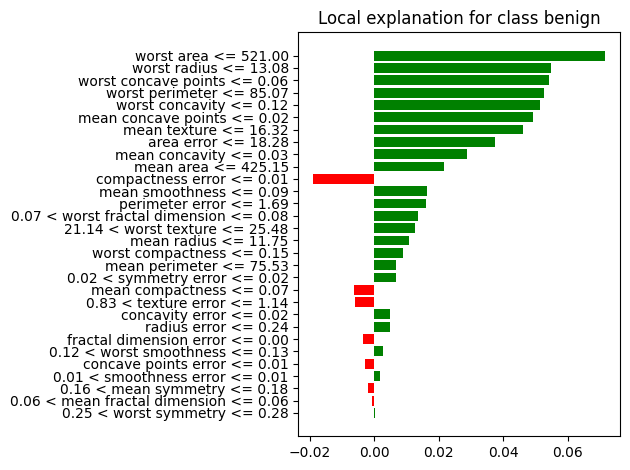

Correct:  Benign
Classification:  [1]
{'mean radius': 11.9, 'mean texture': 14.65, 'mean perimeter': 78.11, 'mean area': 432.8, 'mean smoothness': 0.1152, 'mean compactness': 0.1296, 'mean concavity': 0.0371, 'mean concave points': 0.03003, 'mean symmetry': 0.1995, 'mean fractal dimension': 0.07839, 'radius error': 0.3962, 'texture error': 0.6538, 'perimeter error': 3.021, 'area error': 25.03, 'smoothness error': 0.01017, 'compactness error': 0.04741, 'concavity error': 0.02789, 'concave points error': 0.0111, 'symmetry error': 0.03127, 'fractal dimension error': 0.009423, 'worst radius': 13.15, 'worst texture': 16.51, 'worst perimeter': 86.26, 'worst area': 509.6, 'worst smoothness': 0.1424, 'worst compactness': 0.2517, 'worst concavity': 0.0942, 'worst concave points': 0.06042, 'worst symmetry': 0.2727, 'worst fractal dimension': 0.1036}


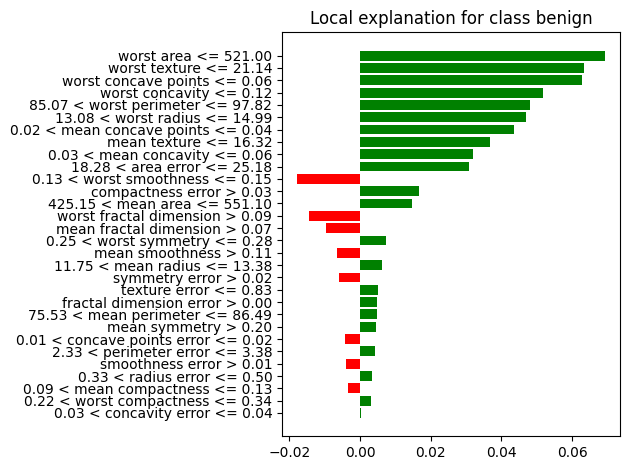

Correct:  Benign
Classification:  [1]
{'mean radius': 14.5, 'mean texture': 10.89, 'mean perimeter': 94.28, 'mean area': 640.7, 'mean smoothness': 0.1101, 'mean compactness': 0.1099, 'mean concavity': 0.08842, 'mean concave points': 0.05778, 'mean symmetry': 0.1856, 'mean fractal dimension': 0.06402, 'radius error': 0.2929, 'texture error': 0.857, 'perimeter error': 1.928, 'area error': 24.19, 'smoothness error': 0.003818, 'compactness error': 0.01276, 'concavity error': 0.02882, 'concave points error': 0.012, 'symmetry error': 0.0191, 'fractal dimension error': 0.002808, 'worst radius': 15.7, 'worst texture': 15.98, 'worst perimeter': 102.8, 'worst area': 745.5, 'worst smoothness': 0.1313, 'worst compactness': 0.1788, 'worst concavity': 0.256, 'worst concave points': 0.1221, 'worst symmetry': 0.2889, 'worst fractal dimension': 0.08006}


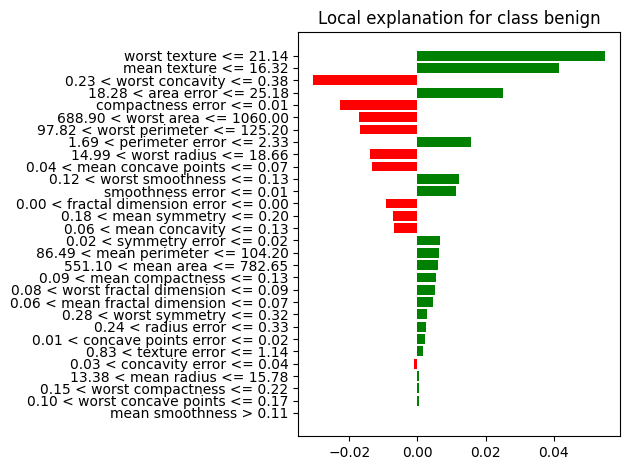

Correct:  Benign
Classification:  [1]
{'mean radius': 11.04, 'mean texture': 16.83, 'mean perimeter': 70.92, 'mean area': 373.2, 'mean smoothness': 0.1077, 'mean compactness': 0.07804, 'mean concavity': 0.03046, 'mean concave points': 0.0248, 'mean symmetry': 0.1714, 'mean fractal dimension': 0.0634, 'radius error': 0.1967, 'texture error': 1.387, 'perimeter error': 1.342, 'area error': 13.54, 'smoothness error': 0.005158, 'compactness error': 0.009355, 'concavity error': 0.01056, 'concave points error': 0.007483, 'symmetry error': 0.01718, 'fractal dimension error': 0.002198, 'worst radius': 12.41, 'worst texture': 26.44, 'worst perimeter': 79.93, 'worst area': 471.4, 'worst smoothness': 0.1369, 'worst compactness': 0.1482, 'worst concavity': 0.1067, 'worst concave points': 0.07431, 'worst symmetry': 0.2998, 'worst fractal dimension': 0.07881}


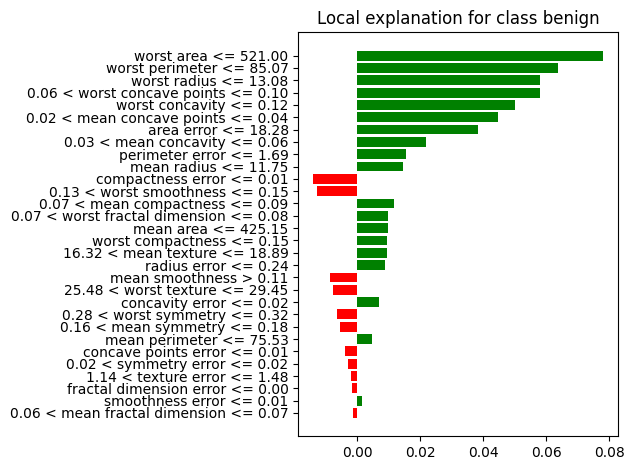

Correct:  Benign
Classification:  [1]
{'mean radius': 14.44, 'mean texture': 15.18, 'mean perimeter': 93.97, 'mean area': 640.1, 'mean smoothness': 0.0997, 'mean compactness': 0.1021, 'mean concavity': 0.08487, 'mean concave points': 0.05532, 'mean symmetry': 0.1724, 'mean fractal dimension': 0.06081, 'radius error': 0.2406, 'texture error': 0.7394, 'perimeter error': 2.12, 'area error': 21.2, 'smoothness error': 0.005706, 'compactness error': 0.02297, 'concavity error': 0.03114, 'concave points error': 0.01493, 'symmetry error': 0.01454, 'fractal dimension error': 0.002528, 'worst radius': 15.85, 'worst texture': 19.85, 'worst perimeter': 108.6, 'worst area': 766.9, 'worst smoothness': 0.1316, 'worst compactness': 0.2735, 'worst concavity': 0.3103, 'worst concave points': 0.1599, 'worst symmetry': 0.2691, 'worst fractal dimension': 0.07683}


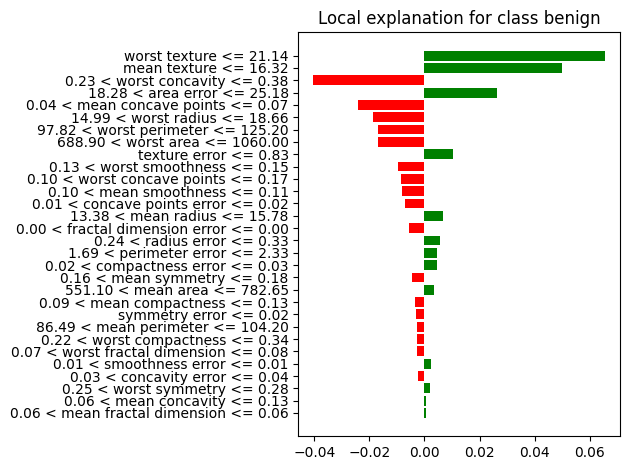

Correct:  Malignant
Classification:  [0]
{'mean radius': 19.59, 'mean texture': 18.15, 'mean perimeter': 130.7, 'mean area': 1214.0, 'mean smoothness': 0.112, 'mean compactness': 0.1666, 'mean concavity': 0.2508, 'mean concave points': 0.1286, 'mean symmetry': 0.2027, 'mean fractal dimension': 0.06082, 'radius error': 0.7364, 'texture error': 1.048, 'perimeter error': 4.792, 'area error': 97.07, 'smoothness error': 0.004057, 'compactness error': 0.02277, 'concavity error': 0.04029, 'concave points error': 0.01303, 'symmetry error': 0.01686, 'fractal dimension error': 0.003318, 'worst radius': 26.73, 'worst texture': 26.39, 'worst perimeter': 174.9, 'worst area': 2232.0, 'worst smoothness': 0.1438, 'worst compactness': 0.3846, 'worst concavity': 0.681, 'worst concave points': 0.2247, 'worst symmetry': 0.3643, 'worst fractal dimension': 0.09223}


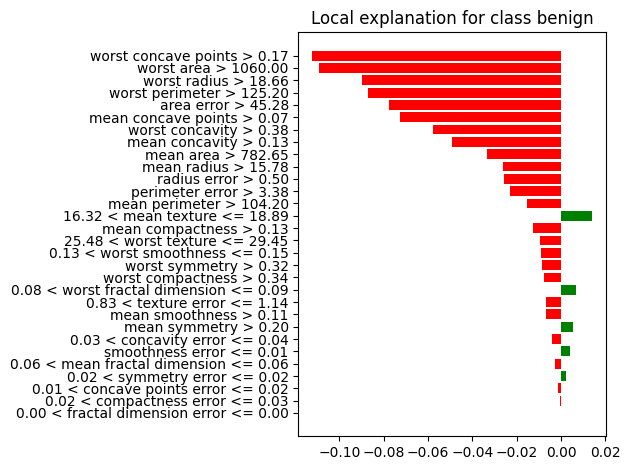

Correct:  Benign
Classification:  [1]
{'mean radius': 10.29, 'mean texture': 27.61, 'mean perimeter': 65.67, 'mean area': 321.4, 'mean smoothness': 0.0903, 'mean compactness': 0.07658, 'mean concavity': 0.05999, 'mean concave points': 0.02738, 'mean symmetry': 0.1593, 'mean fractal dimension': 0.06127, 'radius error': 0.2199, 'texture error': 2.239, 'perimeter error': 1.437, 'area error': 14.46, 'smoothness error': 0.01205, 'compactness error': 0.02736, 'concavity error': 0.04804, 'concave points error': 0.01721, 'symmetry error': 0.01843, 'fractal dimension error': 0.004938, 'worst radius': 10.84, 'worst texture': 34.91, 'worst perimeter': 69.57, 'worst area': 357.6, 'worst smoothness': 0.1384, 'worst compactness': 0.171, 'worst concavity': 0.2, 'worst concave points': 0.09127, 'worst symmetry': 0.2226, 'worst fractal dimension': 0.08283}


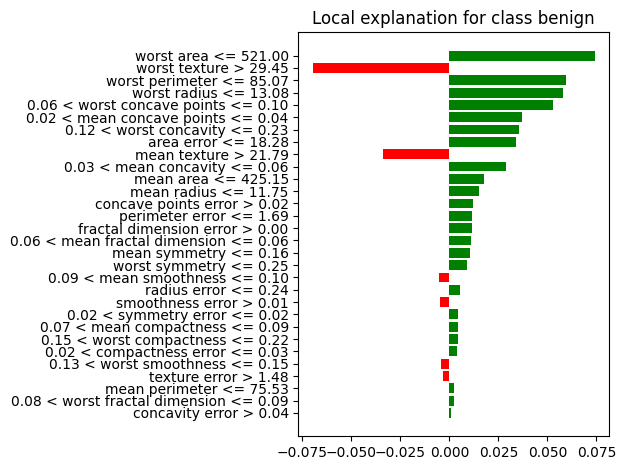

Correct:  Malignant
Classification:  [0]
{'mean radius': 19.4, 'mean texture': 18.18, 'mean perimeter': 127.2, 'mean area': 1145.0, 'mean smoothness': 0.1037, 'mean compactness': 0.1442, 'mean concavity': 0.1626, 'mean concave points': 0.09464, 'mean symmetry': 0.1893, 'mean fractal dimension': 0.05892, 'radius error': 0.4709, 'texture error': 0.9951, 'perimeter error': 2.903, 'area error': 53.16, 'smoothness error': 0.005654, 'compactness error': 0.02199, 'concavity error': 0.03059, 'concave points error': 0.01499, 'symmetry error': 0.01623, 'fractal dimension error': 0.001965, 'worst radius': 23.79, 'worst texture': 28.65, 'worst perimeter': 152.4, 'worst area': 1628.0, 'worst smoothness': 0.1518, 'worst compactness': 0.3749, 'worst concavity': 0.4316, 'worst concave points': 0.2252, 'worst symmetry': 0.359, 'worst fractal dimension': 0.07787}


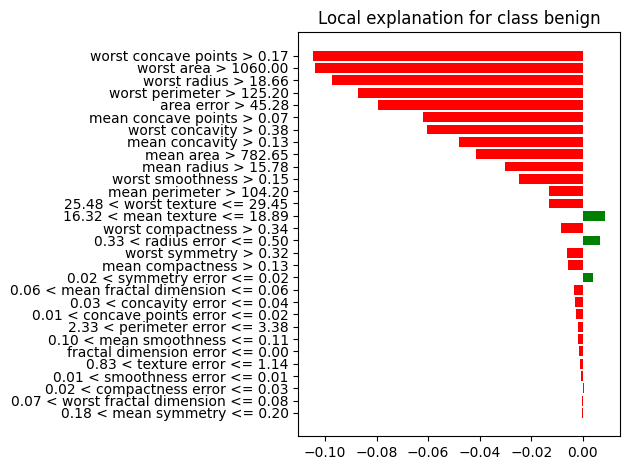

Correct:  Benign
Classification:  [1]
{'mean radius': 9.504, 'mean texture': 12.44, 'mean perimeter': 60.34, 'mean area': 273.9, 'mean smoothness': 0.1024, 'mean compactness': 0.06492, 'mean concavity': 0.02956, 'mean concave points': 0.02076, 'mean symmetry': 0.1815, 'mean fractal dimension': 0.06905, 'radius error': 0.2773, 'texture error': 0.9768, 'perimeter error': 1.909, 'area error': 15.7, 'smoothness error': 0.009606, 'compactness error': 0.01432, 'concavity error': 0.01985, 'concave points error': 0.01421, 'symmetry error': 0.02027, 'fractal dimension error': 0.002968, 'worst radius': 10.23, 'worst texture': 15.66, 'worst perimeter': 65.13, 'worst area': 314.9, 'worst smoothness': 0.1324, 'worst compactness': 0.1148, 'worst concavity': 0.08867, 'worst concave points': 0.06227, 'worst symmetry': 0.245, 'worst fractal dimension': 0.07773}


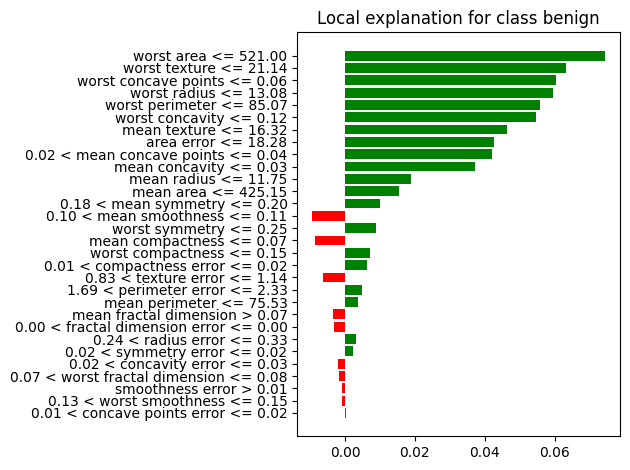

Correct:  Malignant
Classification:  [0]
{'mean radius': 17.2, 'mean texture': 24.52, 'mean perimeter': 114.2, 'mean area': 929.4, 'mean smoothness': 0.1071, 'mean compactness': 0.183, 'mean concavity': 0.1692, 'mean concave points': 0.07944, 'mean symmetry': 0.1927, 'mean fractal dimension': 0.06487, 'radius error': 0.5907, 'texture error': 1.041, 'perimeter error': 3.705, 'area error': 69.47, 'smoothness error': 0.00582, 'compactness error': 0.05616, 'concavity error': 0.04252, 'concave points error': 0.01127, 'symmetry error': 0.01527, 'fractal dimension error': 0.006299, 'worst radius': 23.32, 'worst texture': 33.82, 'worst perimeter': 151.6, 'worst area': 1681.0, 'worst smoothness': 0.1585, 'worst compactness': 0.7394, 'worst concavity': 0.6566, 'worst concave points': 0.1899, 'worst symmetry': 0.3313, 'worst fractal dimension': 0.1339}


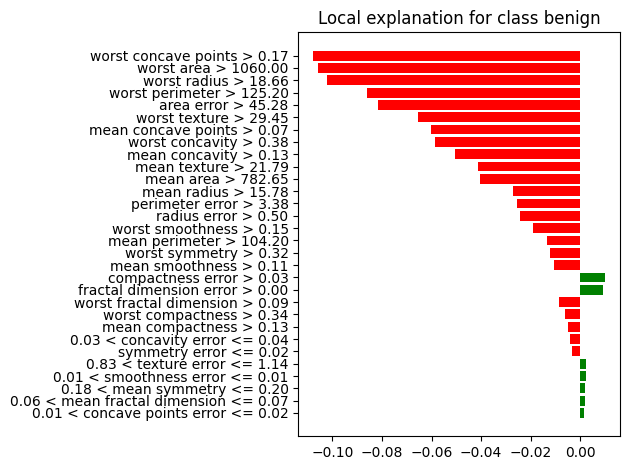

Correct:  Malignant
Classification:  [0]
{'mean radius': 13.71, 'mean texture': 20.83, 'mean perimeter': 90.2, 'mean area': 577.9, 'mean smoothness': 0.1189, 'mean compactness': 0.1645, 'mean concavity': 0.09366, 'mean concave points': 0.05985, 'mean symmetry': 0.2196, 'mean fractal dimension': 0.07451, 'radius error': 0.5835, 'texture error': 1.377, 'perimeter error': 3.856, 'area error': 50.96, 'smoothness error': 0.008805, 'compactness error': 0.03029, 'concavity error': 0.02488, 'concave points error': 0.01448, 'symmetry error': 0.01486, 'fractal dimension error': 0.005412, 'worst radius': 17.06, 'worst texture': 28.14, 'worst perimeter': 110.6, 'worst area': 897.0, 'worst smoothness': 0.1654, 'worst compactness': 0.3682, 'worst concavity': 0.2678, 'worst concave points': 0.1556, 'worst symmetry': 0.3196, 'worst fractal dimension': 0.1151}


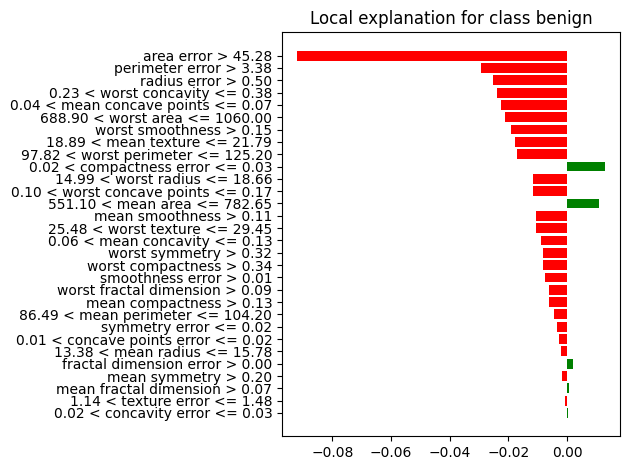

Correct:  Benign
Classification:  [1]
{'mean radius': 13.69, 'mean texture': 16.07, 'mean perimeter': 87.84, 'mean area': 579.1, 'mean smoothness': 0.08302, 'mean compactness': 0.06374, 'mean concavity': 0.02556, 'mean concave points': 0.02031, 'mean symmetry': 0.1872, 'mean fractal dimension': 0.05669, 'radius error': 0.1705, 'texture error': 0.5066, 'perimeter error': 1.372, 'area error': 14.0, 'smoothness error': 0.00423, 'compactness error': 0.01587, 'concavity error': 0.01169, 'concave points error': 0.006335, 'symmetry error': 0.01943, 'fractal dimension error': 0.002177, 'worst radius': 14.84, 'worst texture': 20.21, 'worst perimeter': 99.16, 'worst area': 670.6, 'worst smoothness': 0.1105, 'worst compactness': 0.2096, 'worst concavity': 0.1346, 'worst concave points': 0.06987, 'worst symmetry': 0.3323, 'worst fractal dimension': 0.07701}


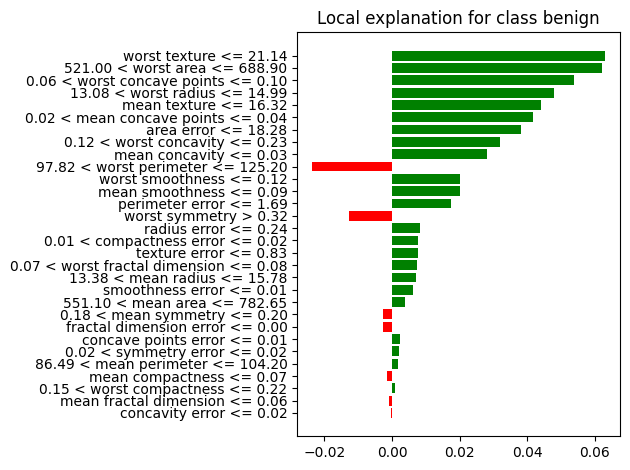

Correct:  Benign
Classification:  [1]
{'mean radius': 12.62, 'mean texture': 23.97, 'mean perimeter': 81.35, 'mean area': 496.4, 'mean smoothness': 0.07903, 'mean compactness': 0.07529, 'mean concavity': 0.05438, 'mean concave points': 0.02036, 'mean symmetry': 0.1514, 'mean fractal dimension': 0.06019, 'radius error': 0.2449, 'texture error': 1.066, 'perimeter error': 1.445, 'area error': 18.51, 'smoothness error': 0.005169, 'compactness error': 0.02294, 'concavity error': 0.03016, 'concave points error': 0.008691, 'symmetry error': 0.01365, 'fractal dimension error': 0.003407, 'worst radius': 14.2, 'worst texture': 31.31, 'worst perimeter': 90.67, 'worst area': 624.0, 'worst smoothness': 0.1227, 'worst compactness': 0.3454, 'worst concavity': 0.3911, 'worst concave points': 0.118, 'worst symmetry': 0.2826, 'worst fractal dimension': 0.09585}


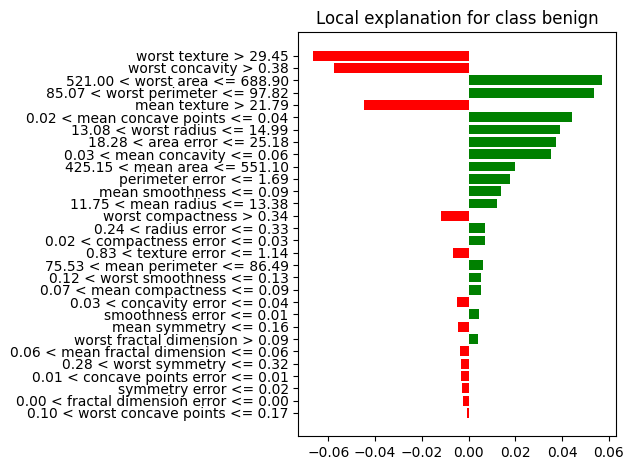

In [9]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data= X_train,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    mode='classification'
)

for i in range(20):
    print('Correct: ', 'Benign' if y_test[i] else 'Malignant')
    print ('Classification: ', forest_clf.predict([X_test[i]]))
    print(dict(zip(data['feature_names'], X_test[i])))
    
    explanation = explainer.explain_instance(
        data_row=X_test[i],
        predict_fn=forest_clf.predict_proba,
        num_features=30
    )

    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()